

# Project: Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering">Data Gathering</a></li>
<li><a href="#Assessing">Data Assessing</a></li>
<li><a href="#Assessing">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](https://knowyourmeme.com/memes/theyre-good-dogs-brent) WeRateDogs has over 9 million followers and has received international media coverage.

In [1]:
# import statements for all of the packages we plan to use
import os
import numpy as np
import pandas as pd
import requests
import json
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

print("lets gooo!")

lets gooo!


<a id='Gathering'></a>
## Data Gathering

The data we need to gather is:
- Enhanced Twitter Archive
- Image Predictions File
- Additional Data via the Twitter API

We will talk about them one by one.


### 1- Enhanced Twitter Archive
WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for students to use in their projects. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 2000+ of their tweets as they stood on August 1, 2017.

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2- Image Predictions File
This file contiain every image in the WeRateDogs Twitter archive ran through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
we will get this file from udacity 

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
if not os.path.exists(url.split('/')[-1]):
    response = requests.get(url)
    with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)

In [3]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3- Additional Data via the Twitter API
Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But because we have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 2000+. we are going to query Twitter's API to gather this valuable data.

In [44]:
consumer_key = '###################'
consumer_secret = '################'
access_token = '###################'
access_secret = '##################'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [84]:
# here we will loop over every tweet we have and try to extract thire json data into tweet_json.txt file
if not os.path.exists('tweet_json.txt'):
    for tweet_id in twitter_archive.tweet_id:
        try:
            status = api.get_status(tweet_id)
            json_tweet = json.dumps(status._json)

            with open('tweet_json.txt', mode='a') as file:
                file.write(json_tweet)
                file.write("\n")

        except Exception as e:
            print(str(tweet_id) + "\n" + str(e))
            
# the printed tweets id is deleted or some reason i don't now

888202515573088257
[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921
[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937
[{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745
[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329
[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744
[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320
[{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130
[{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856
[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
851953902622658560
[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705
[{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984
[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648
[{'code': 144, 'message': 'No s

Rate limit reached. Sleeping for: 284


754011816964026368
[{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288
[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 265


In [12]:
# here we will extract the valueble information we need from the tweets stored in tweet_json.txt
tweets_list = []
with open("tweet_json.txt") as file:
    for line in file:
        tweet = json.loads(line)
        tweets_list.append({
            'tweet_id': tweet['id'],
            'retweet_count': tweet['retweet_count'],
            'favorite_count': tweet['favorite_count']
        })

In [9]:
api_data = pd.DataFrame(tweets_list)

In [10]:
api_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7201,34581
1,892177421306343426,5408,29979
2,891815181378084864,3574,22558
3,891689557279858688,7425,37835
4,891327558926688256,7965,36129


We finished the data gathering with three data frames: `twitter_archive`, `image_predictions`, `api_data`, now we will move to assessing the data we got.

<a id='Assessing'></a>
## Data Assessing

we will search for issues in two aspect: quality and tidiness, and i will document them in the end of this section

In [106]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [105]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [107]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Hall          1
Gerbald       1
Pupcasso      1
Napolean      1
Leonard       1
Name: name, Length: 957, dtype: int64

In [112]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [120]:
type(twitter_archive.doggo[0])

str

In [7]:
len(twitter_archive[twitter_archive.expanded_urls.isnull() == True].expanded_urls)

59

In [152]:
mask1 = twitter_archive.expanded_urls.str.startswith('https://twitter.com/dog_rates') != True
twitter_archive[mask1]['expanded_urls']

6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
27      https://www.gofundme.com/mingusneedsus,https:/...
30                                                    NaN
35      https://twitter.com/4bonds2carbon/status/88551...
42      https://twitter.com/kaijohnson_19/status/88396...
                              ...                        
2189                                                  NaN
2212                        https://vine.co/v/ea0OwvPTx9l
2259    https://twitter.com/dogratingrating/status/667...
2260    https://twitter.com/dogratingrating/status/667...
2298                                                  NaN
Name: expanded_urls, Length: 257, dtype: object

In [151]:
mask1 = twitter_archive.expanded_urls.str.startswith('https://twitter.com/dog_rates')
mask2 = twitter_archive.expanded_urls.str.contains('photo') != True
twitter_archive[(mask1 &  mask2)]['expanded_urls'].values[:5]

array(['https://twitter.com/dog_rates/status/889278841981685760/video/1',
       'https://twitter.com/dog_rates/status/887517139158093824/video/1',
       'https://twitter.com/dog_rates/status/887343217045368832/video/1',
       'https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873',
       'https://twitter.com/dog_rates/status/881536004380872706/video/1'],
      dtype=object)

In [163]:
twitter_archive.duplicated()

0

In [165]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [167]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [168]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2328 non-null   int64
 1   retweet_count   2328 non-null   int64
 2   favorite_count  2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Quality
##### `twitter_archive` table
- Missing tweets urls
- Unneeded columns that dose not represent a variables in `twitter_archive` :(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- Missing dog stages 
- Not all the tweets from dog_rates 
- Some tweets dose not contain photos 
- Some of data are retweets not orginal tweets 
- Uncorrect values in rating_numerator and rating_denominator colmun 
- To much text in source column 
- Uncorrect dog names in name column 
- Erroneous datatypes (tweet_id, timestamp, source, and dog stages column) 




#### Tidiness
- doggo, floofer, pupper, puppo columns in `twitter_archive` should be in one column 
- api_data (retweet_count, favorite_count) should be part of the `twitter_archive` table
- image_predictions ('jpg_url','p1', 'p1_dog') should be part of the `twitter_archive` table


<br></br>
<br></br>
<br></br>

<a id='Cleaning'></a>
## Data Cleaning
last step in the Data Wrangling process is we clean the issues we document in data assessing, first we will handle the missing data issue, thin the tidiness issues, lastly the rest of quality issues

In [2]:
twitter_archive_clean = twitter_archive.copy()

### Missing Data

#### `twitter_archive`: Missing tweets urls

##### Define

- Create a list of ids that dose not have url
- Extract the missing urls from `tweet_json.txt` file we gathered before
- Update the `twitter_archive` with gathered urls
- Drop the IDs that still dose not have url

##### Code

In [196]:
missing_ids = twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull() == True].tweet_id.values

In [197]:
# here we will extract the valueble information we need from the tweets stored in tweet_json.txt
missing_urls = []
with open("tweet_json.txt") as file:
    for line in file:
        tweet = json.loads(line)

        if tweet['id'] in missing_ids and 'extended_entities' in tweet:
            missing_urls.append({
                'tweet_id': tweet['id'],
                'expanded_url': tweet['extended_entities']['media'][0]['expanded_url']

            })

In [198]:
missing_urls

[]

it turns out we did not find any of missing url ids in `tweet_json.txt` we gathered before, that means this tweets might be deleted or some problem happen with it so i will just drop it

In [199]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

##### Test

In [200]:
twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull()].tweet_id.count()

0

### Tidiness

#### doggo, floofer, pupper, puppo columns in `twitter_archive` should be in one column 

##### Define
- Create another column for tweets that is not one of four stages
- Use the melt function to combine the columns into `dog_stage` column
- Remove extra rows created by melt function
- Remove the extra value column

##### Code

In [6]:
# create another column for tweets that is not one of four stages
mask = ((twitter_archive_clean['doggo'] == 'None') & (twitter_archive_clean['floofer'] == 'None') 
        & (twitter_archive_clean['pupper'] == 'None') & (twitter_archive_clean['puppo'] == 'None'))

twitter_archive_clean['not_specified'] = np.where(mask, 'not_specified', 'None')

In [7]:
melted_colums= set(['doggo', 'floofer', 'pupper', 'puppo', 'not_specified'])

twitter_archive_clean = twitter_archive_clean.melt(id_vars= set(twitter_archive_clean.columns).difference(melted_colums), 
                          value_vars= melted_colums, 
                          var_name='dog_stage', 
                          value_name='value')


In [8]:
# remove extra rows created by melt function
mask = twitter_archive_clean['dog_stage'] == twitter_archive_clean['value']
twitter_archive_clean = twitter_archive_clean[mask]

In [9]:
# remove the extra column
twitter_archive_clean.drop(columns='value', inplace=True)

##### Test

In [10]:
twitter_archive_clean.head()

,retweeted_status_id,in_reply_to_status_id,retweeted_status_user_id,timestamp,in_reply_to_user_id,rating_numerator,rating_denominator,retweeted_status_timestamp,name,tweet_id,source,expanded_urls,text,dog_stage
29,NaN,NaN,NaN,2017-07-15 23:25:31 +0000,NaN,12,10,NaN,Roscoe,886366144734445568,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/886366144...,This is Roscoe. Another pupper fallen victim t...,pupper
49,NaN,NaN,NaN,2017-07-06 00:46:41 +0000,NaN,12,10,NaN,Gus,882762694511734784,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/882762694...,This is Gus. He's quite the cheeky pupper. Alr...,pupper
56,NaN,NaN,NaN,2017-07-02 15:32:16 +0000,NaN,14,10,NaN,a,881536004380872706,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/881536004...,Here is a pupper approaching maximum borkdrive...,pupper
78,8.768508e+17,NaN,512804507.0,2017-06-21 19:36:23 +0000,NaN,14,10,2017-06-19 17:14:49 +0000,None,877611172832227328,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/rachel2195/status/87685077...,RT @rachel2195: @dog_rates the boyfriend and h...,pupper
82,NaN,NaN,NaN,2017-06-19 16:24:33 +0000,NaN,12,10,NaN,Ginger,876838120628539392,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/876838120...,This is Ginger. She's having a ruff Monday. To...,pupper


In [11]:
twitter_archive_clean.dog_stage.isnull().sum()

0

In [12]:
twitter_archive_clean.dog_stage.value_counts()

not_specified    1976
pupper            257
doggo              97
puppo              30
floofer            10
Name: dog_stage, dtype: int64

#### api_data (retweet_count, favorite_count) should be part of the `twitter_archive` table

##### Define

- Perform inner join for `twitter_archive` and `api_data` on `tweet_id` 

##### Code

In [13]:
twitter_archive_clean = pd.merge(twitter_archive_clean, api_data,  how='inner', on='tweet_id')

##### Test

In [14]:
twitter_archive_clean.head()

,retweeted_status_id,in_reply_to_status_id,retweeted_status_user_id,timestamp,in_reply_to_user_id,rating_numerator,rating_denominator,retweeted_status_timestamp,name,tweet_id,source,expanded_urls,text,dog_stage,retweet_count,favorite_count
0,NaN,NaN,NaN,2017-07-15 23:25:31 +0000,NaN,12,10,NaN,Roscoe,886366144734445568,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/886366144...,This is Roscoe. Another pupper fallen victim t...,pupper,2709,18976
1,NaN,NaN,NaN,2017-07-06 00:46:41 +0000,NaN,12,10,NaN,Gus,882762694511734784,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/882762694...,This is Gus. He's quite the cheeky pupper. Alr...,pupper,4206,25358
2,NaN,NaN,NaN,2017-07-02 15:32:16 +0000,NaN,14,10,NaN,a,881536004380872706,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/881536004...,Here is a pupper approaching maximum borkdrive...,pupper,13761,44477
3,8.768508e+17,NaN,512804507.0,2017-06-21 19:36:23 +0000,NaN,14,10,2017-06-19 17:14:49 +0000,None,877611172832227328,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/rachel2195/status/87685077...,RT @rachel2195: @dog_rates the boyfriend and h...,pupper,70,0
4,NaN,NaN,NaN,2017-06-19 16:24:33 +0000,NaN,12,10,NaN,Ginger,876838120628539392,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/876838120...,This is Ginger. She's having a ruff Monday. To...,pupper,2871,18645


#### image_predictions ('jpg_url','p1', 'p1_dog') should be part of the `twitter_archive` table

##### Define

- Perform inner join for `twitter_archive` and `image_predictions` on `tweet_id` 

##### Code

In [15]:
twitter_archive_clean =  pd.merge(twitter_archive_clean, image_predictions[['tweet_id','jpg_url', 'p1', 'p1_dog']],  how='inner', on='tweet_id')

##### Test

In [16]:
twitter_archive_clean.head()

,retweeted_status_id,in_reply_to_status_id,retweeted_status_user_id,timestamp,in_reply_to_user_id,rating_numerator,rating_denominator,retweeted_status_timestamp,name,tweet_id,source,expanded_urls,text,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_dog
0,NaN,NaN,NaN,2017-07-15 23:25:31 +0000,NaN,12,10,NaN,Roscoe,886366144734445568,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/886366144...,This is Roscoe. Another pupper fallen victim t...,pupper,2709,18976,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,French_bulldog,True
1,NaN,NaN,NaN,2017-07-06 00:46:41 +0000,NaN,12,10,NaN,Gus,882762694511734784,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/882762694...,This is Gus. He's quite the cheeky pupper. Alr...,pupper,4206,25358,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,Labrador_retriever,True
2,NaN,NaN,NaN,2017-07-02 15:32:16 +0000,NaN,14,10,NaN,a,881536004380872706,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/881536004...,Here is a pupper approaching maximum borkdrive...,pupper,13761,44477,https://pbs.twimg.com/ext_tw_video_thumb/88153...,Samoyed,True
3,8.768508e+17,NaN,512804507.0,2017-06-21 19:36:23 +0000,NaN,14,10,2017-06-19 17:14:49 +0000,None,877611172832227328,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/rachel2195/status/87685077...,RT @rachel2195: @dog_rates the boyfriend and h...,pupper,70,0,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,Irish_setter,True
4,NaN,NaN,NaN,2017-06-19 16:24:33 +0000,NaN,12,10,NaN,Ginger,876838120628539392,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/876838120...,This is Ginger. She's having a ruff Monday. To...,pupper,2871,18645,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,bloodhound,True


### Quality

#### Unneeded columns that dose not represent a variables in `twitter_archive` :(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

##### Define

- drop those columns Unneeded columns :(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

##### Code

In [17]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                            'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [18]:
twitter_archive_clean.head(1)

,timestamp,rating_numerator,rating_denominator,name,tweet_id,source,expanded_urls,text,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_dog
0,2017-07-15 23:25:31 +0000,12,10,Roscoe,886366144734445568,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/886366144...,This is Roscoe. Another pupper fallen victim t...,pupper,2709,18976,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,French_bulldog,True


#### Missing dog stage

##### Define

- Create mask of all not_specified dogs
- Search for each stage in the text of none specified dogs 
- Update the not_specified dogs appear to have stage in thire text

##### Code

In [19]:
twitter_archive_clean.dog_stage.value_counts()

not_specified    1740
pupper            221
doggo              78
puppo              24
floofer             8
Name: dog_stage, dtype: int64

In [20]:
not_specified_mask = twitter_archive_clean.dog_stage == 'not_specified'

twitter_archive_clean[not_specified_mask].text.str.contains('doggo').sum()

6

In [21]:
doggo_mask = twitter_archive_clean[not_specified_mask].text.str.contains('doggo')
twitter_archive_clean.loc[not_specified_mask & doggo_mask ,'dog_stage'] = 'doggo'

In [22]:
#  i have to upate not_specified_mask every time because i don't want to update the same cell twice
not_specified_mask = twitter_archive_clean.dog_stage == 'not_specified'

twitter_archive_clean[not_specified_mask].text.str.contains('floof').sum()

19

In [23]:
floof_mask = twitter_archive_clean[not_specified_mask].text.str.contains('floof')
twitter_archive_clean.loc[not_specified_mask & floof_mask ,'dog_stage'] = 'floofer'

In [24]:
not_specified_mask = twitter_archive_clean.dog_stage == 'not_specified'

twitter_archive_clean[not_specified_mask].text.str.contains('pupper').sum()

23

In [25]:
pupper_mask = twitter_archive_clean[not_specified_mask].text.str.contains('pupper')
twitter_archive_clean.loc[not_specified_mask & pupper_mask ,'dog_stage'] = 'pupper'

In [26]:
not_specified_mask = twitter_archive_clean.dog_stage == 'not_specified'

twitter_archive_clean[not_specified_mask].text.str.contains('puppo').sum()

4

In [27]:
puppo_mask = twitter_archive_clean[not_specified_mask].text.str.contains('puppo')
twitter_archive_clean.loc[not_specified_mask & puppo_mask ,'dog_stage'] = 'puppo'

##### Test

In [28]:
twitter_archive_clean.dog_stage.value_counts()

not_specified    1688
pupper            244
doggo              84
puppo              28
floofer            27
Name: dog_stage, dtype: int64

#### Not all the tweets from dog_rates

##### Define

- Drop all tweets that is not from [@dog_rates](https://twitter.com/dog_rates)

##### Code

In [29]:
mask = twitter_archive_clean.expanded_urls.str.startswith('https://twitter.com/dog_rates')
twitter_archive_clean[mask != True].expanded_urls

3       https://twitter.com/rachel2195/status/87685077...
6       https://www.gofundme.com/help-my-baby-sierra-g...
12      https://twitter.com/alexmartindawg/status/8392...
59      https://twitter.com/jon_hill987/status/7575971...
243     https://www.gofundme.com/help-save-a-pup,https...
248     https://www.petfinder.com/petdetail/34918210,h...
257     http://us.blastingnews.com/news/2017/01/kentuc...
307     https://gofundme.com/ydvmve-surgery-for-jax,ht...
324     https://www.gofundme.com/mingusneedsus,https:/...
356     https://www.gofundme.com/3yd6y1c,https://twitt...
377     https://www.gofundme.com/help-fix-codys-torn-a...
386     https://www.gofundme.com/3ti3nps,https://twitt...
389     https://twitter.com/rachaeleasler/status/86501...
403     https://www.gofundme.com/helpquinny,https://tw...
411     https://twitter.com/tallylott/status/860914485...
412     https://www.gofundme.com/help-lorenzo-beat-can...
424     https://www.gofundme.com/meeko-needs-heart-sur...
437     https:

In [30]:
twitter_archive_clean = twitter_archive_clean[mask]

##### Test

In [31]:
mask = twitter_archive_clean.expanded_urls.str.startswith('https://twitter.com/dog_rates')
twitter_archive_clean[mask != True].expanded_urls

Series([], Name: expanded_urls, dtype: object)

####  Some tweets dose not contain photos

##### Define

- Drop all tweets that dose not have photos

##### Code

In [32]:
mask = twitter_archive_clean.expanded_urls.str.contains('photo')
twitter_archive_clean[mask != True].expanded_urls

2       https://twitter.com/dog_rates/status/881536004...
22      https://twitter.com/dog_rates/status/817777686...
23      https://twitter.com/dog_rates/status/817777686...
24      https://twitter.com/dog_rates/status/815966073...
25      https://twitter.com/dog_rates/status/815966073...
                              ...                        
1542    https://twitter.com/dog_rates/status/676957860...
1551    https://twitter.com/dog_rates/status/676776431...
1591    https://twitter.com/dog_rates/status/675354435...
1606    https://twitter.com/dog_rates/status/674805413...
2067    https://twitter.com/dog_rates/status/749317047...
Name: expanded_urls, Length: 78, dtype: object

In [33]:
twitter_archive_clean = twitter_archive_clean[mask]

##### Test

In [34]:
mask = twitter_archive_clean.expanded_urls.str.contains('photo')
twitter_archive_clean[mask != True].expanded_urls

Series([], Name: expanded_urls, dtype: object)

####  Some of data are retweets not orginal tweets

##### Define

- Drop all records that is retweets

##### Code

In [35]:
mask =  twitter_archive_clean.text.str.contains(r'^RT @dog_rates:')
twitter_archive_clean[mask].text

21      RT @dog_rates: This is Chelsea. She forgot how...
38      RT @dog_rates: This is Sampson. He's about to ...
46      RT @dog_rates: Everybody look at this beautifu...
49      RT @dog_rates: Like father (doggo), like son (...
50      RT @dog_rates: Like father (doggo), like son (...
54      RT @dog_rates: This is just downright precious...
55      RT @dog_rates: This is just downright precious...
251     RT @dog_rates: This is Loki. He smiles like El...
262     RT @dog_rates: This is Bo. He was a very good ...
263     RT @dog_rates: This is Sunny. She was also a v...
329     RT @dog_rates: This is Lilly. She just paralle...
524     RT @dog_rates: This is Moreton. He's the Good ...
525     RT @dog_rates: This is Klein. These pics were ...
558     RT @dog_rates: This is Bailey. She loves going...
566     RT @dog_rates: We only rate dogs. Please don't...
569     RT @dog_rates: This is Paisley. She really wan...
574     RT @dog_rates: Meet Hercules. He can have what...
580     RT @do

In [36]:
twitter_archive_clean = twitter_archive_clean[mask != True]

##### Test

In [37]:
mask =  twitter_archive_clean.text.str.contains(r'^RT @dog_rates:')
twitter_archive_clean[mask].text

Series([], Name: text, dtype: object)

#### Uncorrect values in rating_numerator and rating_denominator colmun

##### Define

- Extract the rating from all text using regex
- split the rating into rating_numerator and rating_denominator

##### Code

In [38]:
twitter_archive_clean.rating_numerator.value_counts()

12      422
10      412
11      386
13      219
9       149
8        93
7        52
5        34
6        32
14       28
3        19
4        15
2         9
1         5
0         2
420       1
84        1
204       1
144       1
143       1
121       1
99        1
88        1
27        1
80        1
75        1
60        1
50        1
45        1
44        1
26        1
1776      1
Name: rating_numerator, dtype: int64

In [39]:
twitter_archive_clean.rating_denominator.value_counts()

10     1878
50        3
11        2
80        2
2         1
20        1
40        1
70        1
90        1
110       1
120       1
130       1
170       1
Name: rating_denominator, dtype: int64

In [40]:
rating = twitter_archive_clean.text.str.extract(r'(\d{1,3}/\d{1,3})')
# twitter_archive_clean.rating_numerator = rating[0].str[0:-3]
twitter_archive_clean[['rating_numerator', 'rating_denominator']] =rating[0].str.split('/', expand= True)

In [41]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(int)

In [42]:
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(int)

##### Test

In [43]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 2070
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   timestamp           1894 non-null   object
 1   rating_numerator    1894 non-null   int32 
 2   rating_denominator  1894 non-null   int32 
 3   name                1894 non-null   object
 4   tweet_id            1894 non-null   int64 
 5   source              1894 non-null   object
 6   expanded_urls       1894 non-null   object
 7   text                1894 non-null   object
 8   dog_stage           1894 non-null   object
 9   retweet_count       1894 non-null   int64 
 10  favorite_count      1894 non-null   int64 
 11  jpg_url             1894 non-null   object
 12  p1                  1894 non-null   object
 13  p1_dog              1894 non-null   bool  
dtypes: bool(1), int32(2), int64(3), object(8)
memory usage: 194.2+ KB


In [44]:
twitter_archive_clean.rating_numerator.value_counts()

12     422
10     412
11     386
13     219
9      149
8       93
7       52
5       34
6       32
14      28
3       19
4       15
2        9
1        5
0        2
420      1
84       1
204      1
144      1
143      1
121      1
99       1
88       1
27       1
80       1
75       1
60       1
50       1
45       1
44       1
26       1
776      1
Name: rating_numerator, dtype: int64

In [45]:
twitter_archive_clean.rating_denominator.value_counts()

10     1878
50        3
11        2
80        2
2         1
20        1
40        1
70        1
90        1
110       1
120       1
130       1
170       1
Name: rating_denominator, dtype: int64

####  To much text in source column 

##### Define

- Replace the long tag with only the source content

##### Code

In [46]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1864
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       20
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [47]:
twitter_archive_clean.source.replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                      '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
                                    ['iPhone', 'Web Client', 'TweetDeck'], inplace=True)

##### Test

In [48]:
twitter_archive_clean.source.value_counts()

iPhone        1864
Web Client      20
TweetDeck       10
Name: source, dtype: int64

####  Uncorrect dog names in name column

##### Define

- Make the uncorrect names equal to None
- find name pattrens other than "This is (dog_name)"
- replace the None with this new pattrens

##### Code

In [49]:
twitter_archive_clean.name.value_counts()

None       509
a           53
Charlie     10
Tucker       9
Cooper       9
          ... 
Aubie        1
Jaycob       1
Comet        1
Baloo        1
Travis       1
Name: name, Length: 906, dtype: int64

In [50]:
mask1 = twitter_archive_clean.name == 'a'
twitter_archive_clean.loc[mask1, 'name'] = 'None'

In [51]:
mask1 = twitter_archive_clean.name == 'None'
mask2 = twitter_archive_clean[mask1].text.str.contains('named')
list(twitter_archive_clean[mask1 & mask2].text)[:3]

["This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI",
 'This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3',
 'This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7']

In [52]:
extracted_names = twitter_archive_clean[mask1 & mask2].text.str.extract(r'(named [A-Za-z]+)')

In [53]:
twitter_archive_clean.loc[extracted_names.index, 'name'] = extracted_names[0].str.lstrip('named ')

##### Test

In [54]:
twitter_archive_clean.name.value_counts()

None       540
Charlie     10
Tucker       9
Penny        9
Lucy         9
          ... 
Aubie        1
Jaycob       1
Comet        1
Baloo        1
Travis       1
Name: name, Length: 923, dtype: int64

####  Erroneous datatypes (tweet_id, timestamp, source, and dog stages column)

##### Define

- Convert each column to correct datatype

##### Code

In [55]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 2070
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   timestamp           1894 non-null   object
 1   rating_numerator    1894 non-null   int32 
 2   rating_denominator  1894 non-null   int32 
 3   name                1894 non-null   object
 4   tweet_id            1894 non-null   int64 
 5   source              1894 non-null   object
 6   expanded_urls       1894 non-null   object
 7   text                1894 non-null   object
 8   dog_stage           1894 non-null   object
 9   retweet_count       1894 non-null   int64 
 10  favorite_count      1894 non-null   int64 
 11  jpg_url             1894 non-null   object
 12  p1                  1894 non-null   object
 13  p1_dog              1894 non-null   bool  
dtypes: bool(1), int32(2), int64(3), object(8)
memory usage: 258.7+ KB


In [56]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

In [57]:
twitter_archive_clean.source = twitter_archive_clean.source.astype('category')

In [58]:
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

In [59]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [60]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 2070
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1894 non-null   datetime64[ns, UTC]
 1   rating_numerator    1894 non-null   int32              
 2   rating_denominator  1894 non-null   int32              
 3   name                1894 non-null   object             
 4   tweet_id            1894 non-null   object             
 5   source              1894 non-null   category           
 6   expanded_urls       1894 non-null   object             
 7   text                1894 non-null   object             
 8   dog_stage           1894 non-null   category           
 9   retweet_count       1894 non-null   int64              
 10  favorite_count      1894 non-null   int64              
 11  jpg_url             1894 non-null   object             
 12  p1                  1894 non-null 

Finally after clean all the tidiness and quality issues we will store the clean dataframe ready for analysis in `twitter_archive_master.csv` file

In [61]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


In [62]:
# importing the data
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

### What dog stage got most retweets ?

In [63]:
grouped = twitter_archive_master.groupby('dog_stage')['retweet_count']
dog_stage_retweet_ratio = grouped.sum() / grouped.count()

In [64]:
dog_stage_retweet_ratio = dog_stage_retweet_ratio.drop('not_specified');
dog_stage_retweet_ratio

dog_stage
doggo      3961.046875
floofer    2508.080000
pupper     1880.770270
puppo      6300.083333
Name: retweet_count, dtype: float64

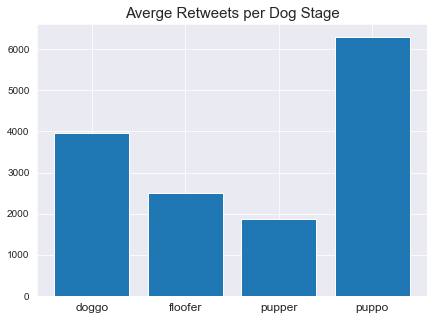

In [65]:
plt.subplots(figsize=(7,5)) 
plt.title('Averge Retweets per Dog Stage', fontsize=15)
plt.bar(x = dog_stage_retweet_ratio.index, height=dog_stage_retweet_ratio);
plt.xticks(fontsize = 12);


We can see that **puppo** has the most retweets

### What dog stage got most favourites ?

In [66]:
grouped = twitter_archive_master.groupby('dog_stage')['favorite_count']
dog_stage_favourite_ratio = grouped.sum() / grouped.count()

In [67]:
dog_stage_favourite_ratio = dog_stage_favourite_ratio.drop('not_specified');
dog_stage_favourite_ratio

dog_stage
doggo      13951.250000
floofer     8912.000000
pupper      6206.833333
puppo      22871.875000
Name: favorite_count, dtype: float64

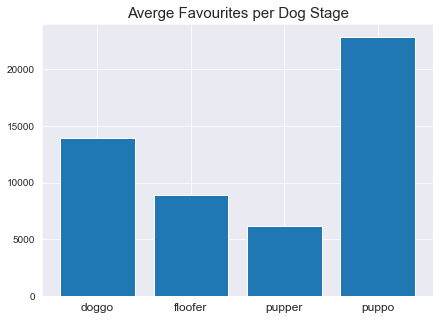

In [68]:
plt.subplots(figsize=(7,5)) 
plt.title('Averge Favourites per Dog Stage', fontsize=15)
plt.bar(x = dog_stage_favourite_ratio.index, height=dog_stage_favourite_ratio);
plt.xticks(fontsize = 12);


Still **puppo** is the winner, people must love this dog stage

### What dog stage got most ratings ?

In [69]:
grouped = twitter_archive_master.groupby('dog_stage')
dog_stage_rating_ratio = grouped['rating_numerator'].sum() / grouped['rating_denominator'].sum()

In [70]:
dog_stage_rating_ratio = dog_stage_rating_ratio.drop('not_specified');
dog_stage_rating_ratio

dog_stage
doggo      1.171250
floofer    1.187097
pupper     1.071852
puppo      1.208333
dtype: float64

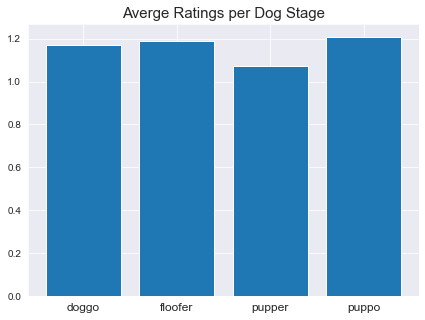

In [71]:
plt.subplots(figsize=(7,5)) 
plt.title('Averge Ratings per Dog Stage', fontsize=15)
plt.bar(x = dog_stage_favourite_ratio.index, height=dog_stage_rating_ratio);
plt.xticks(fontsize = 12);


Seems the person behaind [@dog_rates](https://twitter.com/dog_rates) is neutral but we can see that **pupper** is slightly less than the others

### What is the most retweeted dog breads ?

In [73]:
# we only want the tweets contains dogs
twitter_archive_master = twitter_archive_master[twitter_archive_master.p1_dog]

In [74]:
grouped = twitter_archive_master.groupby('p1')['retweet_count']
dog_bread_retweet_ratio = grouped.sum() / grouped.count()
dog_bread_retweet_ratio = dog_bread_retweet_ratio.sort_values(ascending=False)[:10]

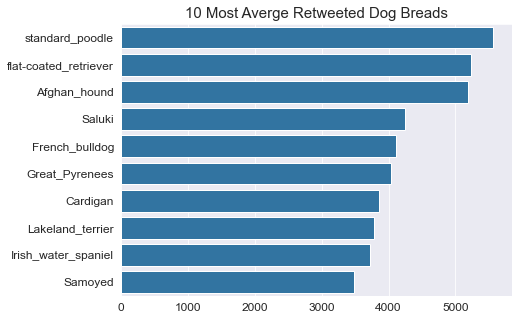

In [75]:
base_color = sns.color_palette()[0]
plt.subplots(figsize=(7,5)) 
plt.title('10 Most Averge Retweeted Dog Breads', fontsize=15)
sns.barplot(x=dog_bread_retweet_ratio, y=dog_bread_retweet_ratio.index, order=dog_bread_retweet_ratio.index, color=base_color);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.xlabel('');
plt.ylabel('');

We can see that standard poodle is the most retweeted dog breed on average

### What is the 10 most Favorited dog breads ?

In [76]:
grouped = twitter_archive_master.groupby('p1')['favorite_count']
dog_bread_favorite_ratio = grouped.sum() / grouped.count()
dog_bread_favorite_ratio = dog_bread_favorite_ratio.sort_values(ascending=False)[:10]

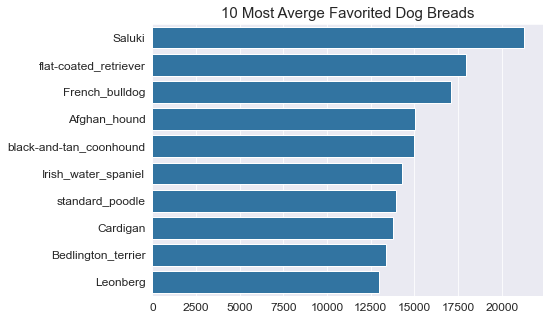

In [77]:
plt.subplots(figsize=(7,5)) 
plt.title('10 Most Averge Favorited Dog Breads', fontsize=15)
sns.barplot(x=dog_bread_favorite_ratio, y=dog_bread_favorite_ratio.index, order=dog_bread_favorite_ratio.index, color=base_color);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.xlabel('');
plt.ylabel('');

We can see that Saluki is the most favorited dog breed on average

### What is the common words on those tweets ?

In [78]:
# Import the word cloud function  
from wordcloud import WordCloud, STOPWORDS

In [79]:
tweets_text = "".join(text + ", " for text in twitter_archive_master.text)

In [80]:
# Create stopword list:
my_stopwords = set(STOPWORDS)
my_stopwords.update(['https','dog','dogs','doggo', 'floofer','floof','pupper', 'puppo','pupp', 'pup', 
                     't', 'h', 'co', 'af', 'ckin', 'rate'])

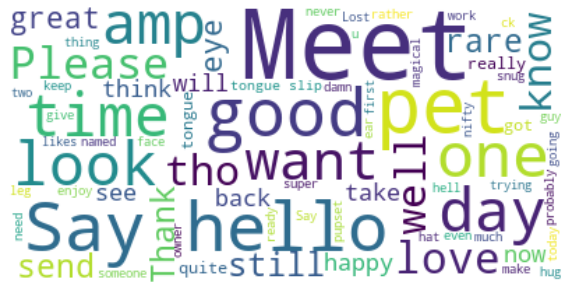

In [81]:
# Create and generate a word cloud image 
my_cloud = WordCloud(min_font_size=8, max_font_size=70, max_words=100, background_color='white',
                     stopwords= my_stopwords).generate(tweets_text)
plt.figure(figsize=[10,7])
# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off");

He always want us **Meet** the doogs and **Say hello** to them, also he **love** them and **think** they are **good pet** and **look really great**

<a id='conclusions'></a>
## Conclusions

in summary i find that **puppo** has the most retweets and favourites on average, all dog stages has similar rating by owner of [@dog_rates](https://twitter.com/dog_rates), **standard poodle** is the most retweeted dog breed on average, but Saluki is the most favorited, and lastly there is a lot of common words such as: Say hello, Meet, love, ...extra


Finally, i enjoyed working in this project, speacially in data wrangling that was really fun, i hope you send me any improvement i could make.

Thank you for reviewing my work.

-Abdullah Majed